# Tugas Besar IF2220 Probabilitas dan Statistika
### Penarikan Kesimpulan dan Pengujian Hipotesis
Anggota:
1. Primanda Adyatma Hafiz - 13520022
2. Hansel Valentino Tanoto - 13520046


In [41]:
# module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as st
import seaborn as sns
import math

## Read File

In [42]:
# set kolom 
columns_name = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'OrganicCarbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# read file
water_potability = pd.read_csv('water_potability.csv', header=None, names=columns_name)
water_potability.index.name = 'id'

# display data
water_potability

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
id,,,,,,,,,,
1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1


## Info Atribut

In [3]:
water_potability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 1 to 2010
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH               2010 non-null   float64
 1   Hardness         2010 non-null   float64
 2   Solids           2010 non-null   float64
 3   Chloramines      2010 non-null   float64
 4   Sulfate          2010 non-null   float64
 5   Conductivity     2010 non-null   float64
 6   OrganicCarbon    2010 non-null   float64
 7   Trihalomethanes  2010 non-null   float64
 8   Turbidity        2010 non-null   float64
 9   Potability       2010 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.7 KB


## Soal 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

##### a. Mean, Standar Deviasi, Nilai Minimum, Quartile, Nilai Maksimum, Median, Variance, Range, IQR, Skewness, dan Kurtosis

In [4]:
desc = water_potability.describe()

# Median
desc.loc['median'] = water_potability.median()

# Variance
desc.loc['variance'] = water_potability.var()

# Range
desc.loc['range'] = water_potability.max()-water_potability.min()

# Interquartile Range
desc.loc['IQR'] = water_potability.quantile(0.75) - water_potability.quantile(0.25)

# Skewness
desc.loc['skewness'] = water_potability.skew()

# Kurtosis
desc.loc['kurtosis'] = water_potability.kurtosis()

desc

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.000000,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,7.087193,195.969209,2.190467e+04,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,1.572803,32.643166,8.625398e+03,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,0.227499,73.492234,3.209426e+02,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.090785,176.740657,1.561441e+04,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,8.053006,216.447589,2.717053e+04,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,14.000000,317.338124,5.648867e+04,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000
median,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
variance,2.473709,1065.576277,7.439749e+07,2.512904,1698.355672,6512.792113,11.060746,258.602066,0.609135,0.240708


##### b. Modus untuk masing masing atribut

In [5]:
# Modus Atribut Non-Target
non_target = water_potability.loc[:, water_potability.columns!='Potability']
Modus = non_target.mode()
Modus

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity
0,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
1,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207
2,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101
3,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554
4,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529
...,...,...,...,...,...,...,...,...,...
2005,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678
2006,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439
2007,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161
2008,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249


- Data atribut non target bersifat unik sehingga setiap data hanya muncul 1 kali. Akibatnya setiap atribut non target merupakan modus. Jadi, masing-masing atribut memiliki modus sebanyak jumlah data, yaitu 2010 buah.

In [6]:
# Modus Atribut Target (Potability)
print(water_potability['Potability'].value_counts())
print("Modus Potability: ", water_potability['Potability'].mode().values[0])

0    1200
1     810
Name: Potability, dtype: int64
Modus Potability:  0


- Data atribut target (Potability) hanya terdiri dari nilai 0 atau 1. Mayoritas data target bernilai 0 sehingga modusnya adalah 0.

## Soal 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

##### a. Atribut pH

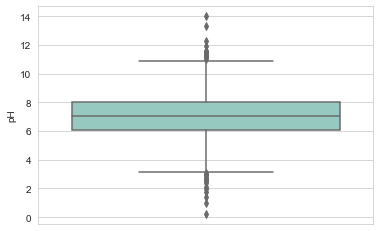

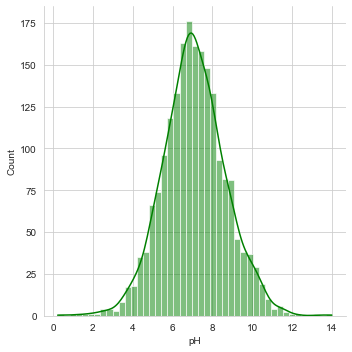

In [7]:
sns.set_style("whitegrid")
# Keseluruhan Data
sns.boxplot(y = 'pH', data = water_potability, palette = 'Set3')
sns.displot(x = 'pH', data = water_potability, kde = True, color = 'Green')

##### b. Atribut Hardness

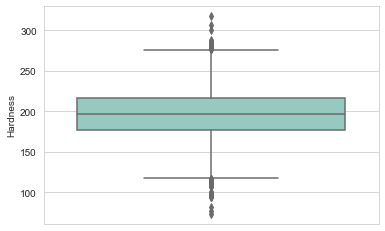

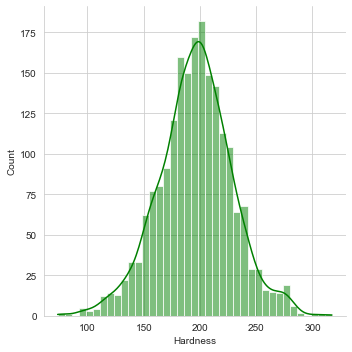

In [8]:
# Keseluruhan Data
sns.boxplot(y = 'Hardness', data = water_potability, palette = 'Set3')
sns.displot(x = 'Hardness', data = water_potability, kde = True, color = 'Green')

##### c. Atribut Solids

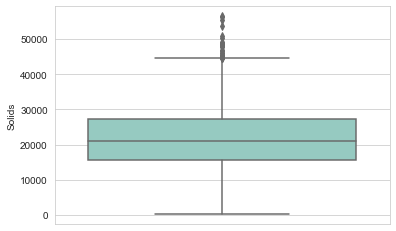

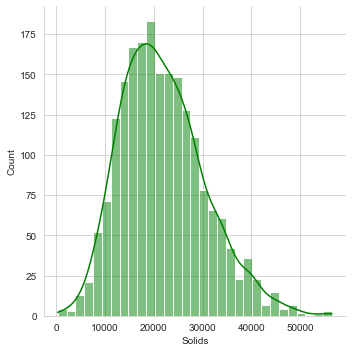

In [9]:
# Keseluruhan Data
sns.boxplot(y = 'Solids', data = water_potability, palette = 'Set3')
sns.displot(x = 'Solids', data = water_potability, kde = True, color = 'Green')

##### d. Atribut Chloramines

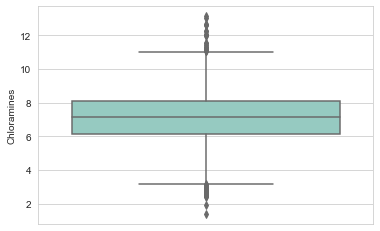

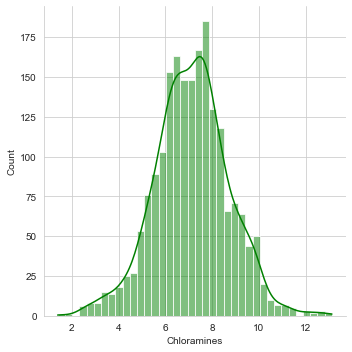

In [10]:
# Keseluruhan Data
sns.boxplot(y = 'Chloramines', data = water_potability, palette = 'Set3')
sns.displot(x = 'Chloramines', data = water_potability, kde = True, color = 'Green')

##### e. Atribut Sulfate

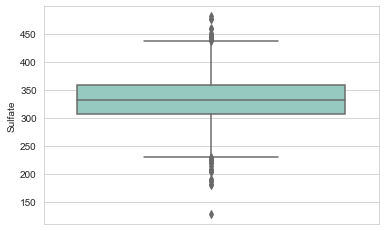

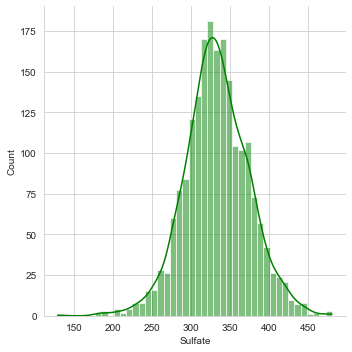

In [11]:
# Keseluruhan Data
sns.boxplot(y = 'Sulfate', data = water_potability, palette = 'Set3')
sns.displot(x = 'Sulfate', data = water_potability, kde = True, color = 'Green')

##### f. Atribut Conductivity

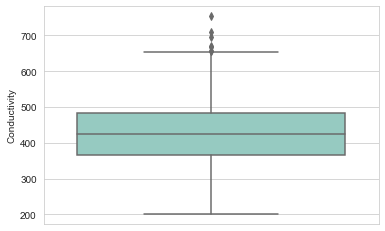

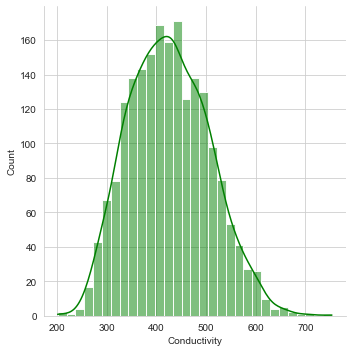

In [12]:
# Keseluruhan Data
sns.boxplot(y = 'Conductivity', data = water_potability, palette = 'Set3')
sns.displot(x = 'Conductivity', data = water_potability, kde = True, color = 'Green')

##### g. Atribut OrganicCarbon

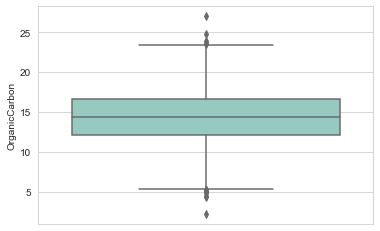

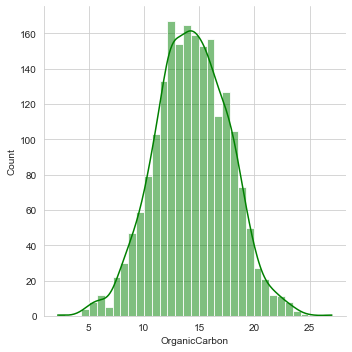

In [13]:
# Keseluruhan Data
sns.boxplot(y = 'OrganicCarbon', data = water_potability, palette = 'Set3')
sns.displot(x = 'OrganicCarbon', data = water_potability, kde = True, color = 'Green')

##### h. Atribut Trihalomethanes

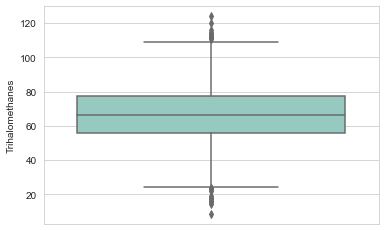

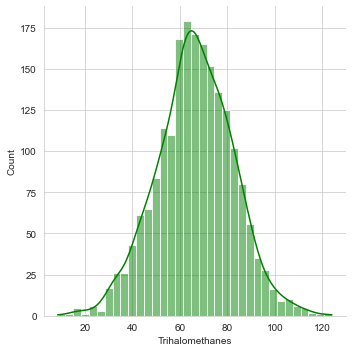

In [14]:
# Keseluruhan Data
sns.boxplot(y = 'Trihalomethanes', data = water_potability, palette = 'Set3')
sns.displot(x = 'Trihalomethanes', data = water_potability, kde = True, color = 'Green')

##### i. Atribut Turbidity

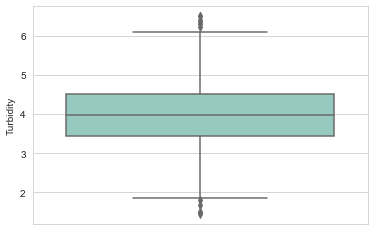

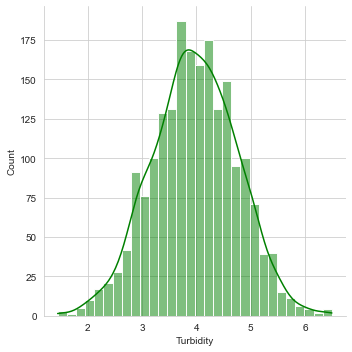

In [15]:
# Keseluruhan Data
sns.boxplot(y = 'Turbidity', data = water_potability, palette = 'Set3')
sns.displot(x = 'Turbidity', data = water_potability, kde = True, color = 'Green')

## Soal 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak

Metode yang digunakan yakni dengan melihat kelancipan dari histogram (kurtosis) serta kesimetrian dari histogram (skewness). Sebuah data dikatakan berdistribusi normal bila distribusi nilainya tidak membentuk histogram yang terlalu landai ataupun terlalu lancip serta histogram juga simetri pada titik mean, median, dan modus

##### a. Atribut pH

Berdasarkan distribusi data atribut pH dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### b. Atribut Hardness

Berdasarkan distribusi data atribut Hardness dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### c. Atribut Solids

Berdasarkan distribusi data atribut Solids dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih kecil dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih besar. Selain itu, kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### d. Atribut Chloramines

Berdasarkan distribusi data atribut Chloramines dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### e. Atribut Sulfate

Berdasarkan distribusi data atribut Sulfate dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih besar dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih kecil. Selain itu, kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### f. Atribut Conductivity

Berdasarkan distribusi data atribut Conductivity dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih kecil dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih kecil. Akan tetapi, kurva tidak terlalu lancip serta tidak terlalu landai. Oleh karena itu kurva tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### g. Atribut OrganicCarbon

Berdasarkan distribusi data atribut OrganicCarbon dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### h. Atribut Trihalomethanes

Berdasarkan distribusi data atribut Trihalomethanes dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### i. Atribut Turbidity

Berdasarkan distribusi data atribut Turbidity dari histogram diperoleh kurva yang simetri, selain itu kurva tidak terlalu lancip maupun terlalu landai sehingga kurva dapat diklasifikasikan sebagai kurva yang berdistribusi normal

## Soal 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [16]:
comparison_symbol = ['<', '≠', '>']

def uji_hipotesis_mean(case, x_bar, mu_0, sigma, n, alpha):
    symbol = comparison_symbol[case]
    print("Uji Hipotesis (mean):")
    print("1. Hipotesis nol\n   H₀: μ = {}".format(mu_0))
    print("2. Hipotesis alternatif\n   H₁: μ {} {} ({}-tailed test)".format(symbol, mu_0, "Two" if case == 1 else "One"))
    print("3. Tingkat signifikan\n   α = {}".format(alpha))
    print("4. Uji statistik menggunakan distribusi normal")
    print("   Daerah kritis adalah ", end="")
    z_0 = st.norm.ppf((1 - alpha / 2) if case == 1 else (1 - alpha))
    if (case == 0):
        print("z < -Zα = {:.3f}".format(-z_0))
        print("   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(1 - alpha))
    elif (case == 1):
        print("z < -Z½α = {:.3f} atau z > Z½α = {:.3f}".format(-z_0, z_0))
        print("   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = {}".format(1 - alpha/2))
    else:
        print("z > Zα = {:.3f}".format(z_0))
        print("   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(1 - alpha))
    print("5. Perhitungan nilai uji statistik dan P-Value")
    print("   z = (x̄ - μ₀) / (σ √n)")
    print("   z = ({} - {}) / ({} √{})".format(x_bar, mu_0, sigma, n))
    z = (x_bar - mu_0) / (sigma * np.sqrt(n))
    print("   z = {:.3f}".format(z))
    P1 = st.norm.cdf(-z/2 if case == 1 else -z)
    P2 = st.norm.sf(z/2 if case == 1 else z)
    if (case == 0):
        print("   P(Z < {:.3f}) = {:.4f}".format(-z, P1))
        terima = P1 > alpha
    elif (case == 1):
        print("   P(Z < {:.3f}) = {:.4f} dan P(Z > {:.3f}) = {:.4f}".format(-z, P1, z, P2))
        terima = P1 > alpha and P2 > alpha
    else:
        print("   P(Z > {:.3f}) = {:.4f}".format(z, P2))
        terima = P2 > alpha
    print("6. Kesimpulan")
    if (terima):
        print("   Tidak menolak H₀ karena nilai P > α sehingga dapat disimpulkan nilai rata-rata pH = {}".format(mu_0))
    else:
        print("   Tolak H₀ karena nilai P < α sehingga dapat disimpulkan nilai rata-rata pH {} {}".format(symbol, mu_0))
    print()

##### a. Nilai Rata-rata pH di atas 7?

Diketahui:
  x̄ = 7.0871927687138285
  σ = 1.5728029470456655
  n = 2010
  μ₀ = 7

Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ = 7
2. Hipotesis alternatif
   H₁: μ > 7 (One-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi normal
   Daerah kritis adalah z > Zα = 1.645
   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = 0.95
5. Perhitungan nilai uji statistik dan P-Value
   z = (x̄ - μ₀) / (σ √n)
   z = (7.0871927687138285 - 7) / (1.5728029470456655 √2010)
   z = 0.001
   P(Z > 0.001) = 0.4995
6. Kesimpulan
   Tidak menolak H₀ karena nilai P > α sehingga dapat disimpulkan nilai rata-rata pH = 7

Boxplot:


<AxesSubplot:ylabel='pH'>

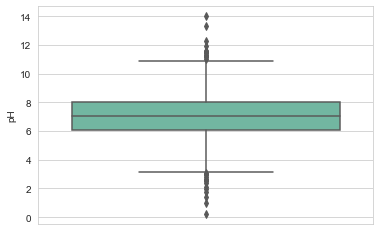

In [17]:
# Variabel
mu_0 = 7
alpha = 0.05
x_bar = water_potability['pH'].mean()
sigma = water_potability['pH'].std()
n = len(water_potability)
print("Diketahui:\n  x̄ = {}\n  σ = {}\n  n = {}\n  μ₀ = {}\n".format(x_bar, sigma, n, mu_0))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_mean(2, x_bar, mu_0, sigma, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'pH', data = water_potability, palette = 'Set2')

##### b. Nilai Rata-rata Hardness tidak sama dengan 205?

Diketahui:
  x̄ = 195.96920903783524
  σ = 32.643165859429864
  n = 2010
  μ₀ = 205
Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ = 205
2. Hipotesis alternatif
   H₁: μ ≠ 205 (Two-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi normal
   Daerah kritis adalah z < -Z½α = -1.960 atau z > Z½α = 1.960
   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = 0.975
5. Perhitungan nilai uji statistik dan P-Value
   z = (x̄ - μ₀) / (σ √n)
   z = (195.96920903783524 - 205) / (32.643165859429864 √2010)
   z = -0.006
   P(Z < 0.006) = 0.5012 dan P(Z > -0.006) = 0.5012
6. Kesimpulan
   Tidak menolak H₀ karena nilai P > α sehingga dapat disimpulkan nilai rata-rata pH = 205

Boxplot:


<AxesSubplot:ylabel='Hardness'>

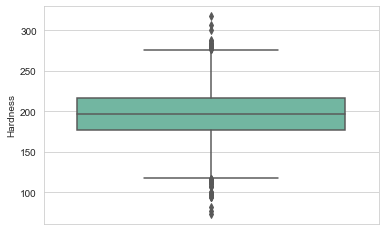

In [18]:
# Variabel
mu_0 = 205
alpha = 0.05
x_bar = water_potability['Hardness'].mean()
sigma = water_potability['Hardness'].std()
n = len(water_potability)
print("Diketahui:\n  x̄ = {}\n  σ = {}\n  n = {}\n  μ₀ = {}".format(x_bar, sigma, n, mu_0))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_mean(1, x_bar, mu_0, sigma, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'Hardness', data = water_potability, palette = 'Set2')

##### c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

Diketahui:
  x̄ = 22347.334446383426
  σ = 7935.967706199006
  n = 100
  μ₀ = 21900
Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ = 21900
2. Hipotesis alternatif
   H₁: μ ≠ 21900 (Two-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi normal
   Daerah kritis adalah z < -Z½α = -1.960 atau z > Z½α = 1.960
   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = 0.975
5. Perhitungan nilai uji statistik dan P-Value
   z = (x̄ - μ₀) / (σ √n)
   z = (22347.334446383426 - 21900) / (7935.967706199006 √100)
   z = 0.006
   P(Z < -0.006) = 0.4989 dan P(Z > 0.006) = 0.4989
6. Kesimpulan
   Tidak menolak H₀ karena nilai P > α sehingga dapat disimpulkan nilai rata-rata pH = 21900

Boxplot:


<AxesSubplot:ylabel='Solids'>

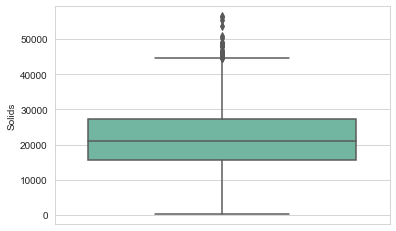

In [19]:
# Variabel
mu_0 = 21900
alpha = 0.05
x_bar = water_potability.head(100)['Solids'].mean()
sigma = water_potability.head(100)['Solids'].std()
n = 100
print("Diketahui:\n  x̄ = {}\n  σ = {}\n  n = {}\n  μ₀ = {}".format(x_bar, sigma, n, mu_0))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_mean(1, x_bar, mu_0, sigma, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'Solids', data = water_potability, palette = 'Set2')

##### d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

##### e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

## Soal 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

##### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Diketahui:
  x̄₁ = 331.30532950549565
  x̄₂ = 335.11742332488245
  σ₁ = 41.332754590968776
  σ₂ = 41.02112948764952
  n₁ = 1005
  n₂ = 1005
  d₀ = 0
  α = 0.05


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 atau μ₁-μ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < -1.960 atau z > 1.960 , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = 0.025 atau P(Z < z) = 1 - α/2 = 0.975
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((331.30532950549565 - 335.11742332488245) - 0) / (√(41.332754590968776²/1005 + 41.02112948764952²/1005)
   z = -0.074
   P = 0.4707010325658625
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir sama

Boxplot:


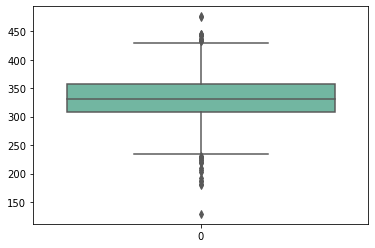

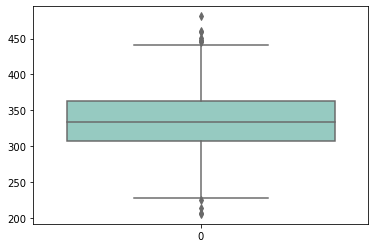

In [61]:
# Split data into two
dataSulfate1=water_potability["Sulfate"][:len(water_potability)//2]
dataSulfate2=water_potability["Sulfate"][len(water_potability)//2:len(water_potability)]

d_0=0
x_bar_1=dataSulfate1.mean()
x_bar_2=dataSulfate2.mean()
sigma_1=dataSulfate1.std()
sigma_2=dataSulfate2.std()
alpha=0.05
n_1=len(dataSulfate1)
n_2=len(dataSulfate2)
h_0=0
z_01=st.norm.ppf(alpha/2)
z_02=st.norm.ppf(1 - alpha/2)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} atau μ₁-μ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = {} atau P(Z < z) = 1 - α/2 = {}".format(z_01,z_02,alpha/2, (1 - alpha/2)))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot( data = dataSulfate1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataSulfate2.values, palette = 'Set3')
plt.show()

##### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Diketahui:
  x̄₁ = 14.253972723723393
  x̄₂ = 14.461907080372754
  σ₁ = 3.3511620707420766
  σ₂ = 3.2985726887318214
  n₁ = 1005
  n₂ = 1005
  d₀ = 0
  α = 0.05


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0.15
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0.15   (One tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z > 1.645 , diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = 0.95
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((14.253972723723393 - 14.461907080372754) - 0) / (√(3.3511620707420766²/1005 + 3.2985726887318214²/1005)
   z = -0.007
   P = 0.4973973874468988
6. Kesimpulan
   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir sama dengan 0.15

Boxplot:


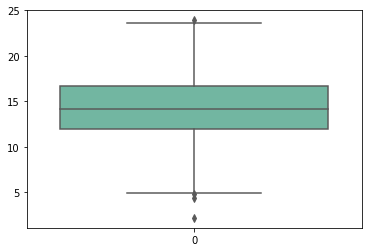

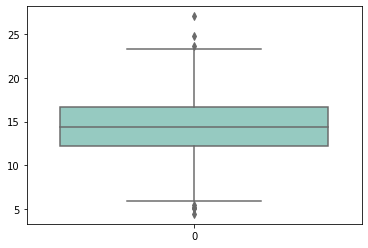

In [55]:
# Split data into two
dataOrganicCarbon1=water_potability["OrganicCarbon"][:len(water_potability)//2]
dataOrganicCarbon2=water_potability["OrganicCarbon"][len(water_potability)//2:len(water_potability)]

d_0=0
x_bar_1=dataOrganicCarbon1.mean()
x_bar_2=dataOrganicCarbon2.mean()
sigma_1=dataOrganicCarbon1.std()
sigma_2=dataOrganicCarbon2.std()
alpha=0.05
n_1=len(dataOrganicCarbon1)
n_2=len(dataOrganicCarbon2)
h_0=0.15
z_0=st.norm.ppf(1 - alpha)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {}   (One tailed test)".format(h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(z_0,1-alpha))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha):
    print("   Nilai P > 1 - α, maka tolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir lebih dari {}".format(h_0))
else:
    print("   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir sama dengan {}".format(h_0))

print("\nBoxplot:")

sns.boxplot( data = dataOrganicCarbon1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataOrganicCarbon2.values, palette = 'Set3')
plt.show()

##### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Diketahui:
  x̄₁ = 7.007771140423921
  x̄₂ = 7.147197636249925
  σ₁ = 1.4808922939392726
  σ₂ = 1.306806325954166
  n₁ = 100
  n₂ = 100
  d₀ = 0
  α = 0.05


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 atau μ₁-μ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < -1.960 atau z > 1.960 , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = 0.025 atau P(Z < z) = 1 - α/2 = 0.975
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((7.007771140423921 - 7.147197636249925) - 0) / (√(1.4808922939392726²/100 + 1.306806325954166²/100)
   z = -0.014
   P = 0.49448535294654233
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir sama

Boxplot:


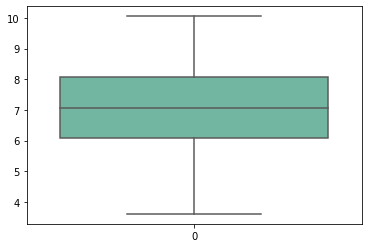

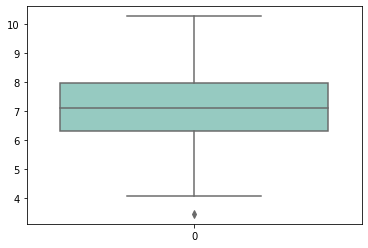

In [62]:
# Split data into two
dataChloramines1=water_potability["Chloramines"][:100]
dataChloramines2=water_potability["Chloramines"][-100:]

d_0=0
x_bar_1=dataChloramines1.mean()
x_bar_2=dataChloramines2.mean()
sigma_1=dataChloramines1.std()
sigma_2=dataChloramines2.std()
alpha=0.05
n_1=len(dataChloramines1)
n_2=len(dataChloramines2)
h_0=0
z_01=st.norm.ppf(alpha/2)
z_02=st.norm.ppf(1 - alpha/2)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} atau μ₁-μ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = {} atau P(Z < z) = 1 - α/2 = {}".format(z_01,z_02,alpha/2, (1 - alpha/2)))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot( data = dataChloramines1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataChloramines2.values, palette = 'Set3')
plt.show()

##### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

Diketahui:
  p̂₁ = 0.4835820895522388
  p̂₂ = 0.48656716417910445
  n₁ = 1005
  n₂ = 1005
  α = 0.05
  p = 0.48507462686567165
  q = 0.5149253731343284


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: p₁-p₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 (One tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z > 1.645 , diperoleh dari nilai z yang memenuhi dan P(Z < z) = 1 - α = 0.95
5. Perhitungan p-value
   z = (p̂₁ - p̂₂) / (√(pq (1/n₁ + 1/n₂) )
   z = (0.4835820895522388 - 0.48656716417910445) / (√(0.485074626865671650.5149253731343284 (1/1005 + 1/1005) )
   z = -0.134
   P = 0.4467449424088169
6. Kesimpulan
   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan proporsi Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di akhir Turbidity

Boxplot:


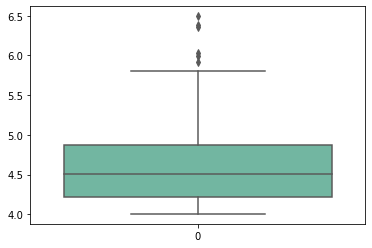

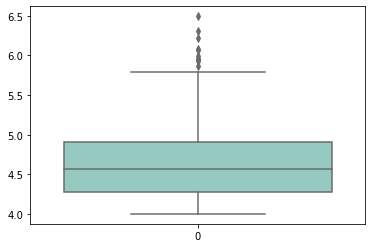

In [47]:
# Split data into two
dataTurbidity1=water_potability["Turbidity"][:len(water_potability)//2]
dataTurbidity1=dataTurbidity1[dataTurbidity1>4]
dataTurbidity2=water_potability["Turbidity"][len(water_potability)//2:len(water_potability)]
dataTurbidity2=dataTurbidity2[dataTurbidity2>4]

alpha=0.05
n_1=len(water_potability)//2
n_2=len(water_potability)-len(water_potability)//2
p_1=len(dataTurbidity1)/n_1
p_2=len(dataTurbidity2)/n_2
h_0=0
z_0=st.norm.ppf(1 - alpha)
p=(p_1*n_1+p_2*n_2)/(n_1+n_2)
q=1-p

print("Diketahui:\n  p̂₁ = {}\n  p̂₂ = {}\n  n₁ = {}\n  n₂ = {}\n  α = {}\n  p = {}\n  q = {}\n".format(p_1,p_2,n_1,n_2,alpha,p,q))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: p₁-p₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} (One tailed test)".format(h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z > {:.3f} , diperoleh dari nilai z yang memenuhi dan P(Z < z) = 1 - α = {}".format(z_0, (1 - alpha)))
print("5. Perhitungan p-value")
print("   z = (p̂₁ - p̂₂) / (√(pq (1/n₁ + 1/n₂) )")
print("   z = ({} - {}) / (√({}{} (1/{} + 1/{}) )".format(p_1, p_2, p, q, n_1, n_2))
z = (p_1 - p_2) / math.sqrt(p*q*(1/n_1+1/n_2))
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha):
    print("   Nilai P > 1 - α, maka tolak H₀ dan dapat disimpulkan proporsi Turbidity yang lebih dari 4 lebih besar dibandingkan proporsi nilai yang sama di akhir Turbidity")
else:
    print("   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan proporsi Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di akhir Turbidity")

print("\nBoxplot:")

sns.boxplot( data = dataTurbidity1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataTurbidity2.values, palette = 'Set3')
plt.show()

##### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

In [53]:
st.f.ppf(q=0.05,dfn=11,dfd=9)

0.3452773085573657

Diketahui:
  s₁ = 7.007771140423921
  s₂ = 7.147197636249925
  n₁ = 1.4808922939392726
  n₂ = 1.306806325954166
  α = 1005


Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: σ₁-σ₂ = 0
2. Hipotesis alternatif
   H₁: σ₁-σ₂ > 0 atau σ₁-σ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < 0.279 atau z > 3.912 , diperoleh dari nilai z yang memenuhi P(F > f) = 1 - α/2 = 0.975 atau P(F > f) = α/2 = 0.025
5. Perhitungan p-value
   f = s₁²/s₂²
   f = 41.332754590968776²/41.02112948764952²
   f = 1.015
   P = 0.8450069272025367
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir sama

Boxplot:


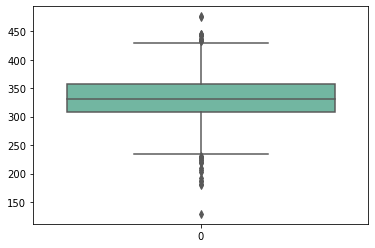

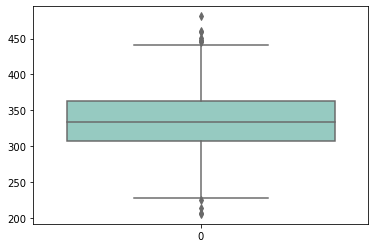

In [65]:
# Split data into two
dataSulfate1=water_potability["Sulfate"][:len(water_potability)//2]
dataSulfate2=water_potability["Sulfate"][len(water_potability)//2:]

s_1=dataSulfate1.std()
s_2=dataSulfate2.std()
alpha=0.05
n_1=len(dataSulfate1)
n_2=len(dataSulfate2)
h_0=0
f_1=st.f.ppf(q=alpha/2,dfn=11,dfd=9)
f_2=st.f.ppf(q=1-alpha/2,dfn=11,dfd=9)

print("Diketahui:\n  s₁ = {}\n  s₂ = {}\n  n₁ = {}\n  n₂ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("\nUji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: σ₁-σ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: σ₁-σ₂ > {} atau σ₁-σ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(F > f) = 1 - α/2 = {} atau P(F > f) = α/2 = {}".format(f_1, f_2, (1 - alpha/2), alpha/2,))
print("5. Perhitungan p-value")
print("   f = s₁²/s₂²")
print("   f = {}²/{}²".format(s_1,s_2))
f = s_1**2/s_2**2
print("   f = {:.3f}".format(f))
P = st.norm.cdf(f)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot( data = dataSulfate1.values, palette = 'Set2')
plt.show()
sns.boxplot( data = dataSulfate2.values, palette = 'Set3')
plt.show()

## Soal 6
Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Metode yang digunakan yaitu dengan mengecek koefisien korelasi untuk setiap atribut non-target terhadap atribut target. Jika diperoleh koefisien korelasi lebih dari 0.5 maka akan disimpulkan bahwa kedua atribut memiliki korelasi saling berbanding lurus. Sedangkan bila diperoleh koefisien korelasi kurang dari -0.5 akan disimpulkan bahwa kedua atribut memiliki korelasi saling berbanding terbalik. Kemudian bila tidak memenuhi dua kasus tersebut makan akan disimpulkan bahwa kedua atribut tidak berkorelasi

##### a. Korelasi pH - Potability

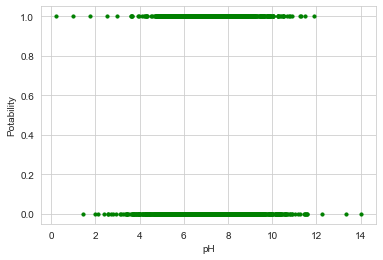

Koefisien korelasi = 0.015475094408433492


In [23]:
water_potability.plot.scatter(x="pH",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["pH"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut pH dan Potability tidak saling berkorelasi 

##### b. Korelasi Hardness - Potability

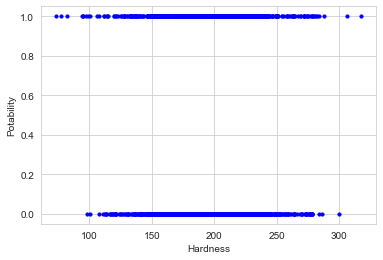

Koefisien korelasi = -0.0014631528959479442


In [24]:
water_potability.plot.scatter(x="Hardness",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Hardness"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Hardness dan Potability tidak saling berkorelasi 

##### c. Korelasi Solids - Potability

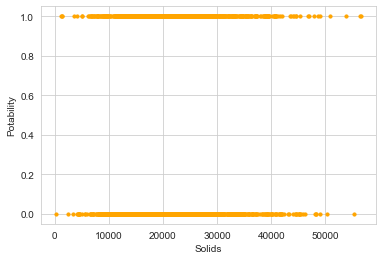

Koefisien korelasi = 0.0389765781817347


In [25]:
water_potability.plot.scatter(x="Solids",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Solids"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Solids dan Potability tidak saling berkorelasi 

##### d. Korelasi Chloramines - Potability

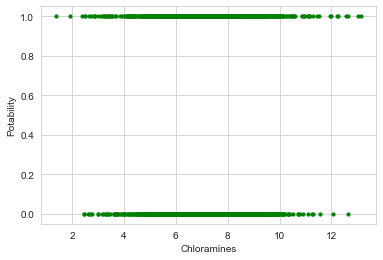

Koefisien korelasi = 0.020778921840524087


In [26]:
water_potability.plot.scatter(x="Chloramines",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["Chloramines"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Chloramines dan Potability tidak saling berkorelasi 

##### e. Korelasi  Sulfate - Potability

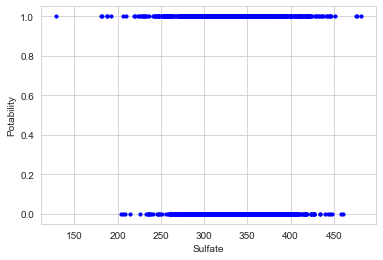

Koefisien korelasi = -0.01570316441927379


In [27]:
water_potability.plot.scatter(x="Sulfate",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Sulfate"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Sulfate dan Potability tidak saling berkorelasi 

##### f. Korelasi  Conductivity - Potability

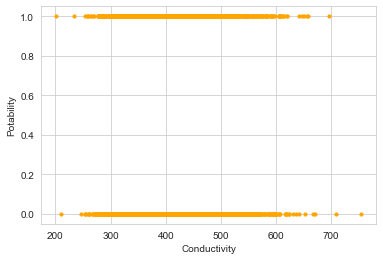

Koefisien korelasi = -0.016257120111377105


In [28]:
water_potability.plot.scatter(x="Conductivity",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Conductivity"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Conductivity dan Potability tidak saling berkorelasi 

##### g. Korelasi  OrganicCarbon - Potability

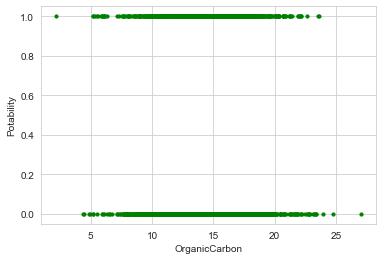

Koefisien korelasi = -0.015488461910747282


In [29]:
water_potability.plot.scatter(x="OrganicCarbon",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["OrganicCarbon"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut OrganicCarbon dan Potability tidak saling berkorelasi 

##### h. Korelasi  Trihalomethanes - Potability

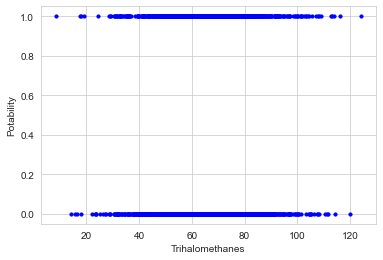

Koefisien korelasi = 0.009236711064713004


In [30]:
water_potability.plot.scatter(x="Trihalomethanes",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Trihalomethanes"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Trihalomethanes dan Potability tidak saling berkorelasi 

##### i. Korelasi  Turbidity - Potability

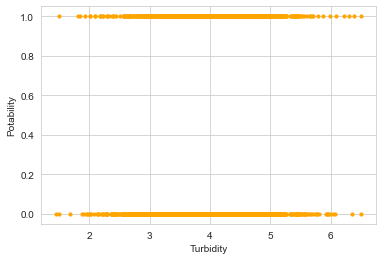

Koefisien korelasi = 0.022331042640622675


In [31]:
water_potability.plot.scatter(x="Turbidity",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Turbidity"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Turbidity dan Potability tidak saling berkorelasi 